In [1]:
import time
import warnings
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from optbinning import OptimalBinning
from joblib import Parallel, delayed
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_parquet('train_seg2.parquet')
oos = pd.read_parquet('oos_seg2.parquet')
oot = pd.read_parquet('oot_seg2.parquet')

In [3]:
target_col = "BAD_NEXT_12M"
train[target_col] = train[target_col].astype(int)
y_train_full = train[target_col] 

In [4]:
train.columns

Index(['C_GIOITINH', 'TTHONNHAN', 'NHANVIENBIDV', 'BASE_AUM', 'TUOI', 'INCOME',
       'CBAL', 'AFLIMT_AVG', 'LTV', 'N_AVG_DEPOSIT_12M', 'FLAG_SALARY_ACC',
       'FLAG_DEPOSIT', 'UTILIZATION_RATE', 'CNT_CREDIT_CARDS',
       'AMT_CASH_ADVANCE_12M', 'PCT_PAYMENT_TO_BALANCE', 'CNT_MIN_PAY_6M',
       'AVG_DAYS_PAST_DUE', 'DTI_RATIO', 'MOB', 'CNT_OTHER_PRODUCTS',
       'LIMIT_TO_INCOME', 'AMT_VAR_6M', 'CBAL_SHORTTERM_LOAN',
       'CBAL_LONGTERM_LOAN', 'CNT_DPD_30PLUS_6M', 'OCCUPATION_TYPE',
       'DURATION_MAX', 'REMAINING_DURATION_MAX', 'TIME_TO_OP_MAX', 'RATE_AVG',
       'PURCOD_MAX', 'MAX_DPD_12M', 'AVG_OD_DPD_12M', 'N_AVG_OVERDUE_CBAL_12M',
       'BAD_NEXT_12M', 'SEGMENT'],
      dtype='object')

Binning 

Skip AVG_OD_DPD_12M: Biến hằng số (1 unique value)

Processing: C_GIOITINH
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[F],98083,0.486453,94127,3956,0.040333,0.008635,0.000036,0.000005
1,[M],103546,0.513547,99302,4244,0.040987,-0.008117,0.000034,0.000004
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.000070,0.000009


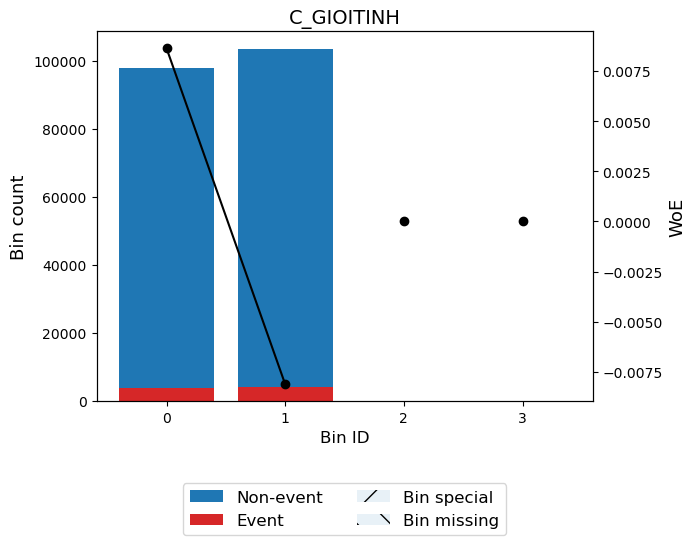


Processing: TTHONNHAN
   -> STATUS: OPTIMAL
   -> IV: 0.0053
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[Married],108258,0.536917,104140,4118,0.038039,0.069592,0.002519,0.000315
1,[Single],93371,0.463083,89289,4082,0.043718,-0.075485,0.002732,0.000341
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.005251,0.000656


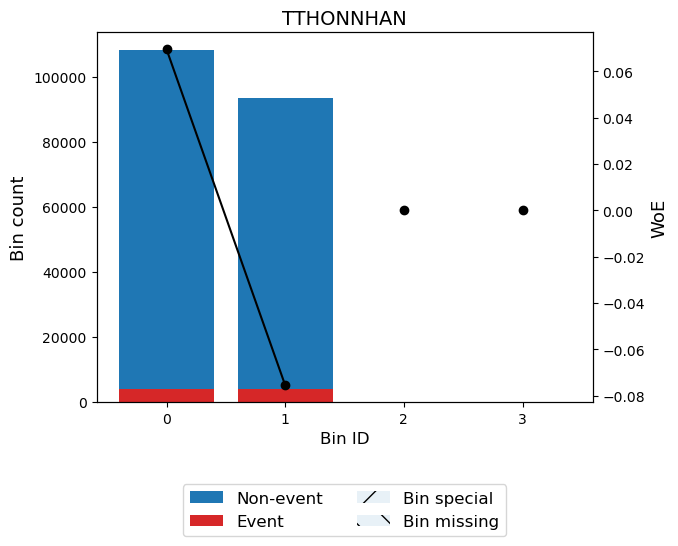


Processing: NHANVIENBIDV
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, inf)",201629,1.0,193429,8200,0.040669,0.0,0.0,0.0
1,Special,0,0.0,0,0,0.000000,0.0,0.0,0.0
2,Missing,0,0.0,0,0,0.000000,0.0,0.0,0.0
Totals,,201629,1.0,193429,8200,0.040669,,0.0,0.0


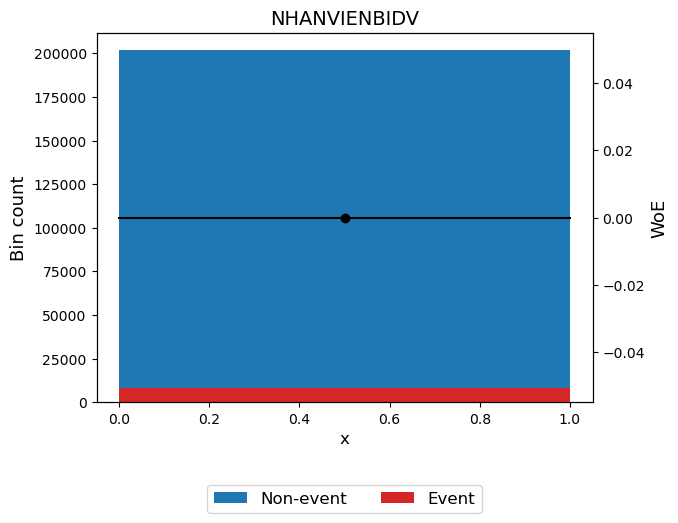


Processing: BASE_AUM
   -> STATUS: OPTIMAL
   -> IV: 0.0531
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1556872.50)",24671,0.122358,23098,1573,0.063759,-0.474015,0.034326,0.004251
1,"[1556872.50, 2836312.50)",41106,0.203869,39256,1850,0.045006,-0.105858,0.002399,0.000300
2,"[2836312.50, 3929434.00)",31961,0.158514,30773,1188,0.037170,0.09359,0.001330,0.000166
3,"[3929434.00, 7258944.00)",57718,0.286258,55634,2084,0.036107,0.123729,0.004142,0.000517
4,"[7258944.00, inf)",46173,0.229000,44668,1505,0.032595,0.229688,0.010885,0.001358
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.053082,0.006592


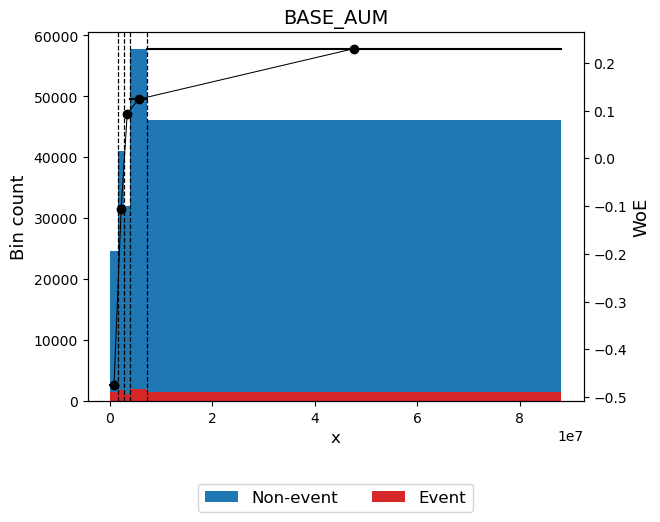


Processing: TUOI
   -> STATUS: OPTIMAL
   -> IV: 0.0229
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 30.50)",25997,0.128935,24545,1452,0.055853,-0.33321,0.016720,0.002080
1,"[30.50, 34.50)",26933,0.133577,25780,1153,0.042810,-0.053545,0.000393,0.000049
2,"[34.50, 39.50)",44280,0.219611,42515,1765,0.039860,0.02093,0.000095,0.000012
3,"[39.50, inf)",104419,0.517877,100589,3830,0.036679,0.107402,0.005688,0.000711
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.022896,0.002852


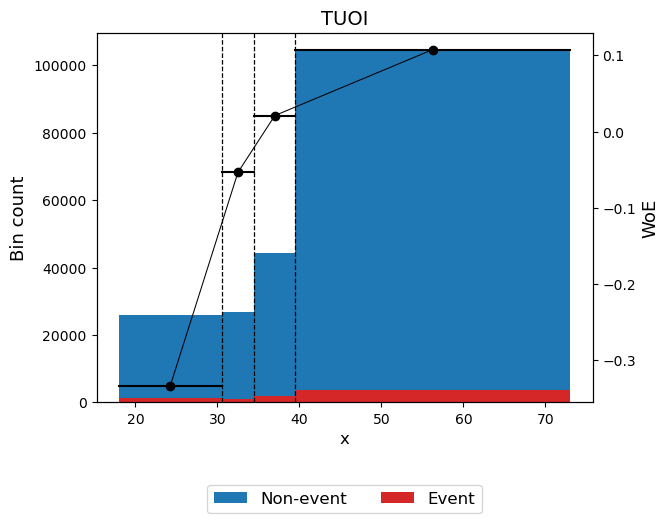


Processing: INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.2434
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 15006313.50)",21851,0.108372,19560,2291,0.104846,-1.016278,0.181170,0.021719
1,"[15006313.50, 21112098.00)",73523,0.364645,70873,2650,0.036043,0.125554,0.005428,0.000678
2,"[21112098.00, 25166660.00)",45419,0.225260,43899,1520,0.033466,0.202405,0.008417,0.001050
3,"[25166660.00, 29792464.00)",25366,0.125805,24615,751,0.029607,0.328929,0.011733,0.001460
4,"[29792464.00, inf)",25390,0.125924,24823,567,0.022332,0.61839,0.036599,0.004503
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,10080,0.049993,9659,421,0.041766,-0.027764,0.000039,0.000005
Totals,,201629,1.000000,193429,8200,0.040669,,0.243386,0.029416


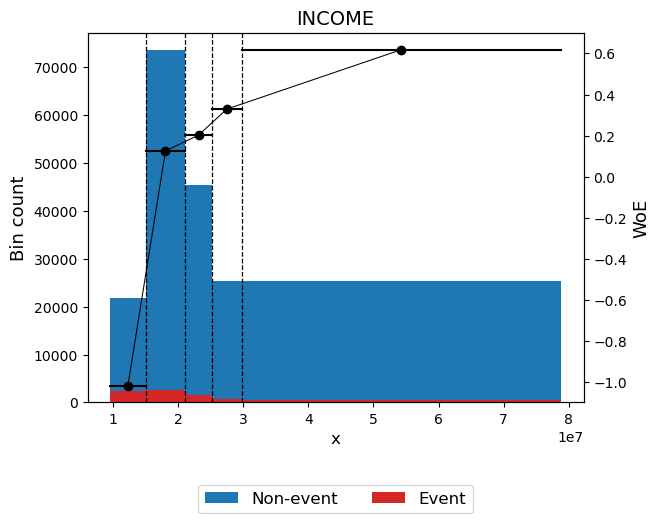


Processing: CBAL
   -> STATUS: OPTIMAL
   -> IV: 0.0474
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 145506112.00)",21779,0.108015,21319,460,0.021121,0.675351,0.036549,0.004484
1,"[145506112.00, 202087592.00)",26845,0.133141,25892,953,0.035500,0.141298,0.002492,0.000311
2,"[202087592.00, 250729800.00)",24186,0.119953,23174,1012,0.041842,-0.029674,0.000107,0.000013
3,"[250729800.00, 576846048.00)",99501,0.493486,95144,4357,0.043789,-0.077169,0.003045,0.000381
4,"[576846048.00, inf)",29318,0.145406,27900,1418,0.048366,-0.181397,0.005204,0.000650
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.047397,0.005839


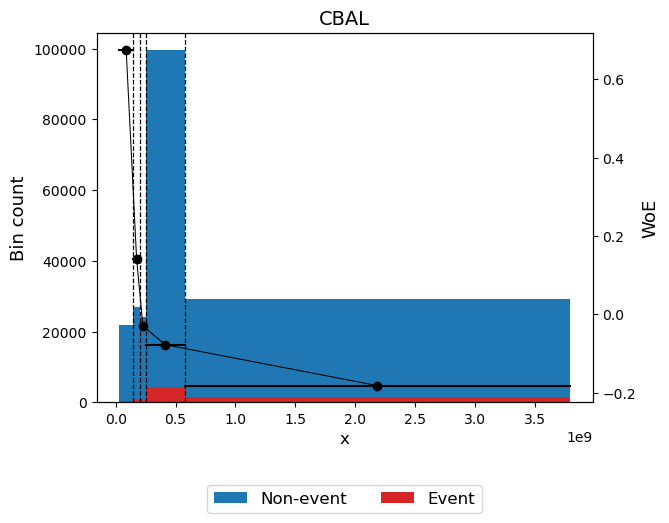


Processing: AFLIMT_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.0778
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 455317296.00)",33745,0.167362,31515,2230,0.066084,-0.512314,0.055854,0.006906
1,"[455317296.00, 542303680.00)",34542,0.171315,33092,1450,0.041978,-0.033048,0.000190,0.000024
2,"[542303680.00, 613456512.00)",29375,0.145688,28375,1000,0.034043,0.184732,0.004571,0.000571
3,"[613456512.00, inf)",103967,0.515635,100447,3520,0.033857,0.190393,0.017141,0.002139
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.077756,0.009640


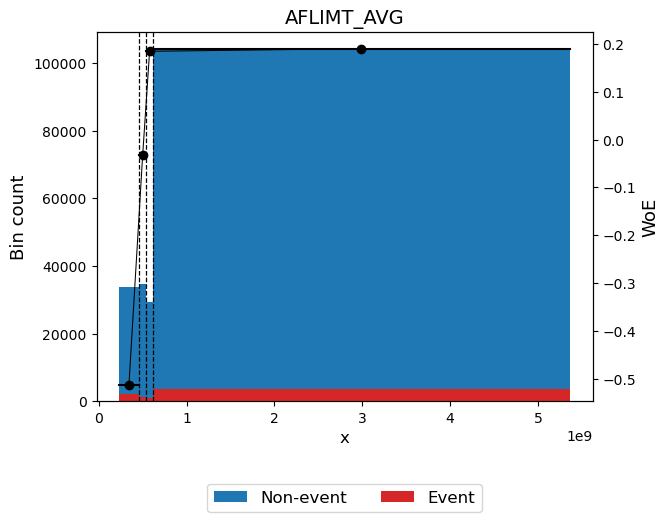


Processing: LTV
   -> STATUS: OPTIMAL
   -> IV: 0.0476
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 7.27)",21825,0.108243,21364,461,0.021123,0.675288,0.036620,0.004493
1,"[7.27, 10.09)",26879,0.133309,25925,954,0.035492,0.141523,0.002503,0.000313
2,"[10.09, 12.54)",24391,0.120970,23369,1022,0.041901,-0.031127,0.000119,0.000015
3,"[12.54, 29.03)",99946,0.495693,95571,4375,0.043774,-0.076813,0.003030,0.000379
4,"[29.03, inf)",28588,0.141785,27200,1388,0.048552,-0.185423,0.005312,0.000663
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.047585,0.005862


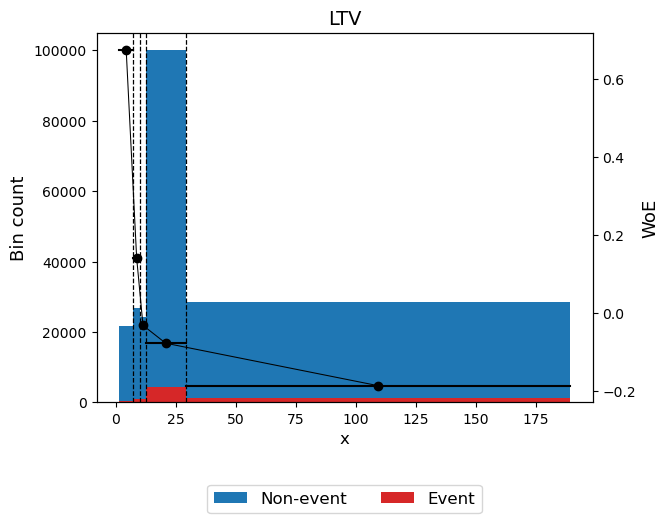


Processing: N_AVG_DEPOSIT_12M
   -> STATUS: OPTIMAL
   -> IV: 0.2188
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 391048.00)",35452,0.175828,32848,2604,0.073451,-0.625934,0.092476,0.011374
1,"[391048.00, 791764.00)",55630,0.275903,52939,2691,0.048373,-0.181549,0.009891,0.001235
2,"[791764.00, 1088177.00)",34832,0.172753,33638,1194,0.034279,0.177571,0.005024,0.000627
3,"[1088177.00, 1571321.50)",45019,0.223276,43887,1132,0.025145,0.496856,0.044141,0.005462
4,"[1571321.50, inf)",30696,0.152240,30117,579,0.018862,0.790766,0.067287,0.008198
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.218820,0.026896


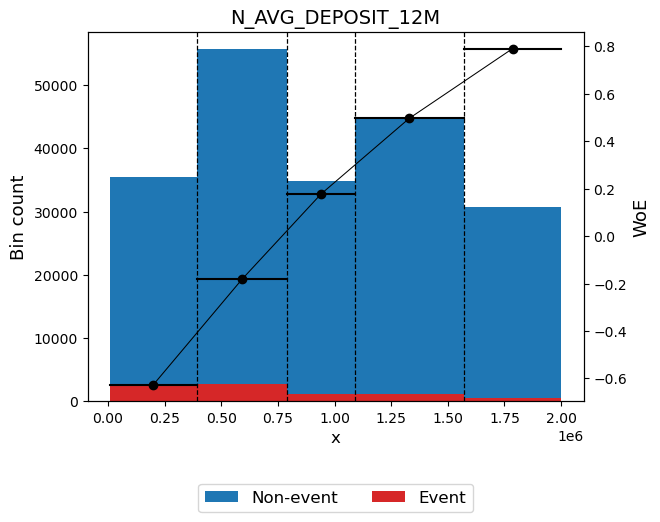


Processing: FLAG_SALARY_ACC
   -> STATUS: OPTIMAL
   -> IV: 0.2373
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",22970,0.113922,20552,2418,0.105268,-1.020759,0.192543,0.023075
1,"[0.50, inf)",178659,0.886078,172877,5782,0.032363,0.237054,0.044715,0.005576
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.237258,0.028651


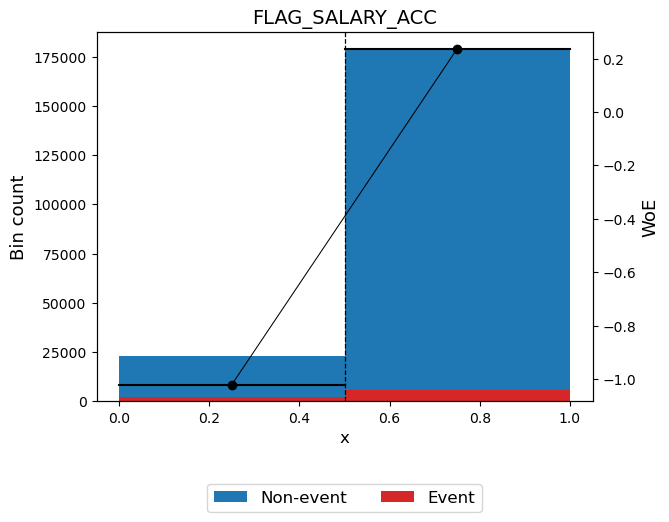


Processing: FLAG_DEPOSIT
   -> STATUS: OPTIMAL
   -> IV: 0.1530
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",116223,0.57642,110053,6170,0.053088,-0.279513,0.051285,0.006390
1,"[0.50, inf)",85406,0.42358,83376,2030,0.023769,0.554548,0.101749,0.012558
2,Special,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.00000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.00000,193429,8200,0.040669,,0.153034,0.018948


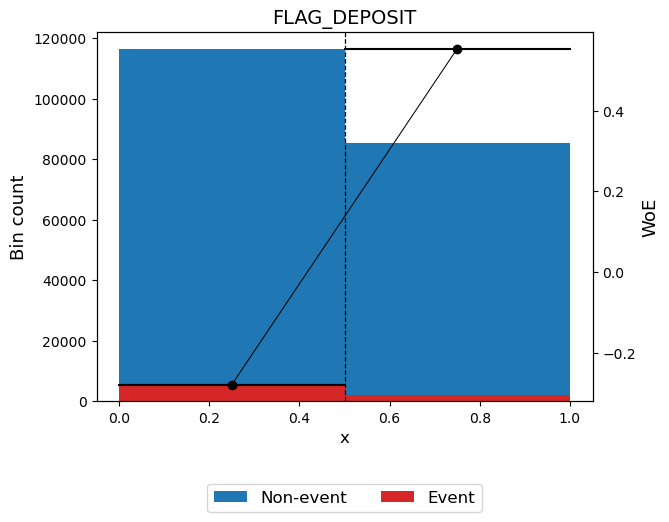


Processing: UTILIZATION_RATE
   -> STATUS: OPTIMAL
   -> IV: 0.1840
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.32)",43489,0.215688,42610,879,0.020212,0.720283,0.081459,9.967763e-03
1,"[0.32, 0.43)",38224,0.189576,37176,1048,0.027417,0.408003,0.026271,3.261311e-03
2,"[0.43, 0.59)",48726,0.241662,46738,1988,0.040800,-0.003348,0.000003,3.391094e-07
3,"[0.59, 0.72)",42183,0.209211,39820,2363,0.056018,-0.336339,0.027683,3.444167e-03
4,"[0.72, inf)",29007,0.143863,27085,1922,0.066260,-0.515163,0.048613,6.010329e-03
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,201629,1.000000,193429,8200,0.040669,,0.184029,2.268391e-02


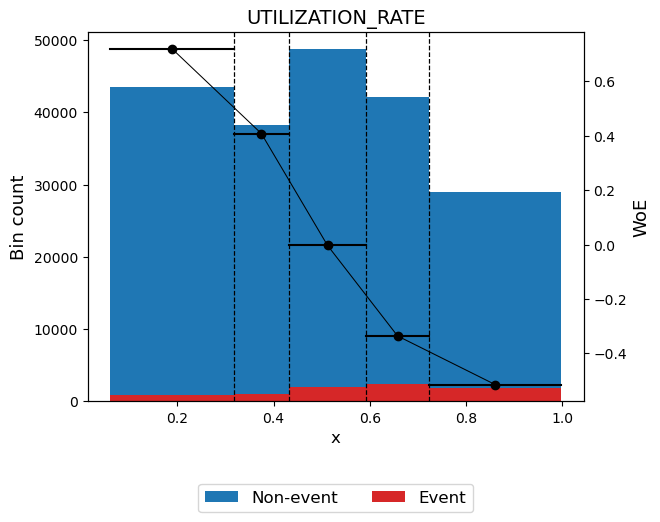


Processing: CNT_CREDIT_CARDS
   -> STATUS: OPTIMAL
   -> IV: 0.0003
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",45068,0.223519,43176,1892,0.041981,-0.033126,0.000249,0.000031
1,"[0.50, inf)",156561,0.776481,150253,6308,0.040291,0.009726,0.000073,0.000009
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.000322,0.000040


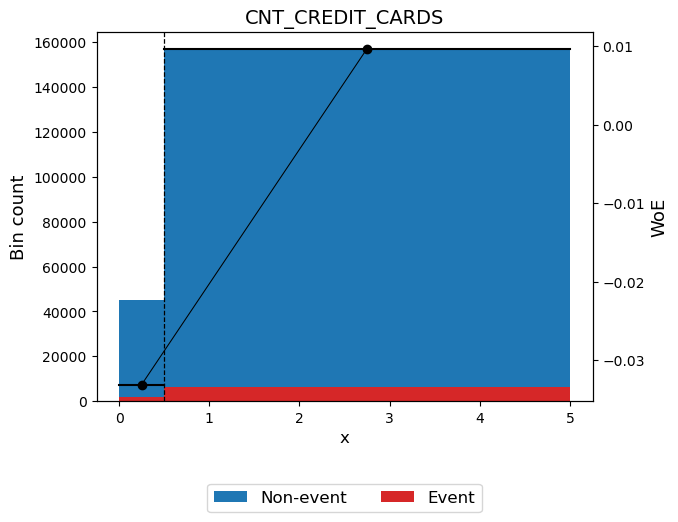


Processing: AMT_CASH_ADVANCE_12M
   -> STATUS: OPTIMAL
   -> IV: 0.0199
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 32986952.00)",168189,0.834151,161784,6405,0.038082,0.068407,0.003783,0.000473
1,"[32986952.00, inf)",33440,0.165849,31645,1795,0.053678,-0.291201,0.016104,0.002006
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.019887,0.002479


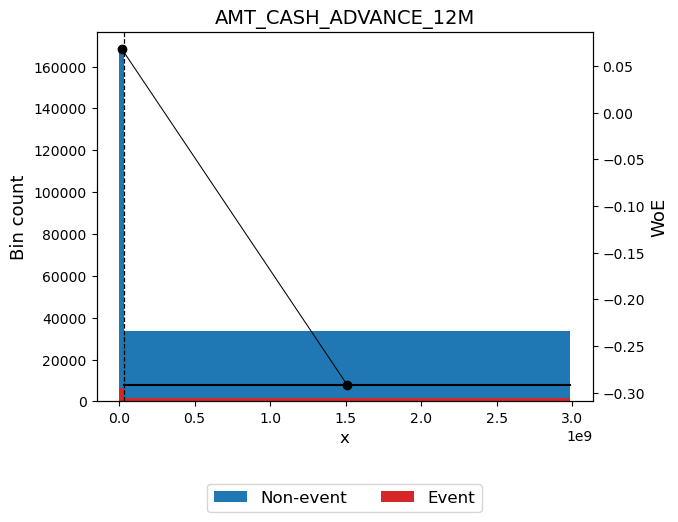


Processing: PCT_PAYMENT_TO_BALANCE
   -> STATUS: OPTIMAL
   -> IV: 0.0398
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.78)",40564,0.201181,38484,2080,0.051277,-0.242902,0.013287,0.001657
1,"[0.78, 0.90)",22116,0.109687,21079,1037,0.046889,-0.148831,0.002603,0.000325
2,"[0.90, 1.22)",71647,0.355341,68681,2966,0.041397,-0.018518,0.000123,0.000015
3,"[1.22, 1.49)",45407,0.225201,43887,1520,0.033475,0.202131,0.008393,0.001047
4,"[1.49, inf)",21895,0.108591,21298,597,0.027266,0.413675,0.015431,0.001915
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.039837,0.004960


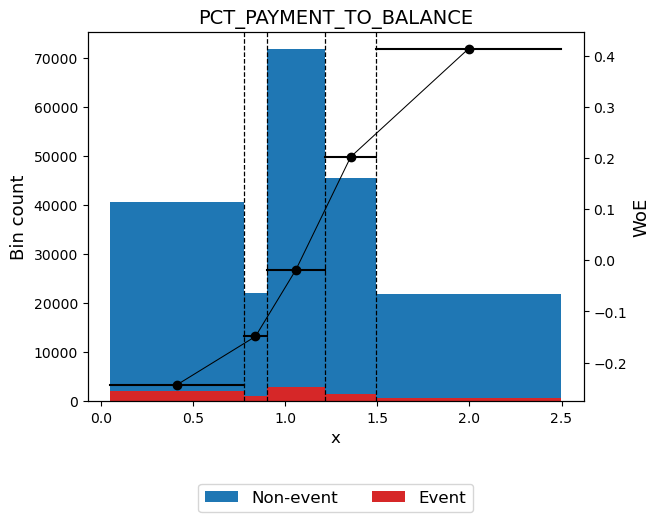


Processing: CNT_MIN_PAY_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0803
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",129615,0.642839,125418,4197,0.032381,0.236506,0.032298,0.004028
1,"[0.50, 1.50)",28087,0.139300,26686,1401,0.049881,-0.213824,0.007033,0.000877
2,"[1.50, inf)",43927,0.217861,41325,2602,0.059235,-0.395589,0.041012,0.005093
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.080343,0.009999


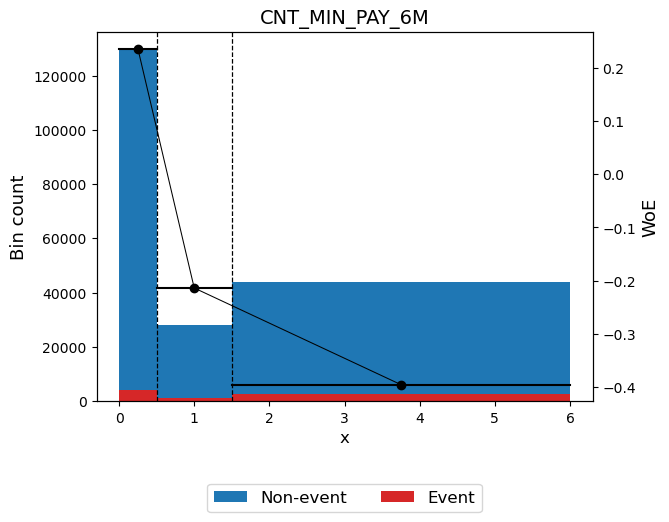


Processing: AVG_DAYS_PAST_DUE
   -> STATUS: OPTIMAL
   -> IV: 0.0798
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",131328,0.651335,127053,4275,0.032552,0.231044,0.031307,0.003905
1,"[0.50, 5.50)",48500,0.240541,45950,2550,0.052577,-0.269316,0.019773,0.002464
2,"[5.50, inf)",21801,0.108124,20426,1375,0.063071,-0.462421,0.028709,0.003557
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.079790,0.009926


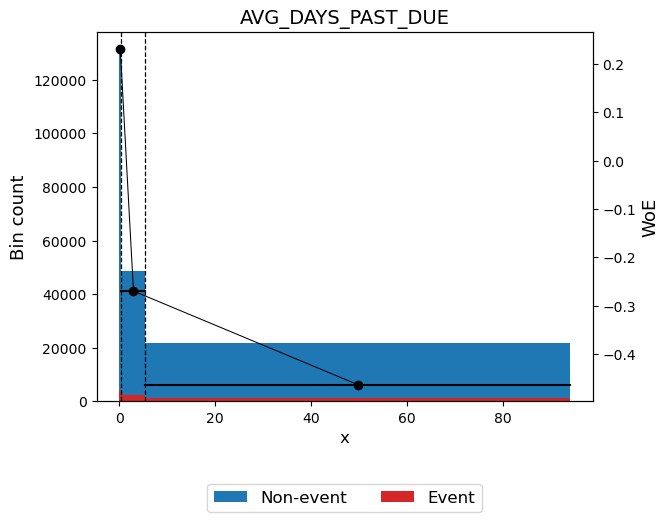


Processing: DTI_RATIO
   -> STATUS: OPTIMAL
   -> IV: 0.2221
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.00)",70761,0.350947,69264,1497,0.021156,0.673686,0.118248,0.014508
1,"[1.00, 1.21)",27611,0.136940,26621,990,0.035855,0.130974,0.002213,0.000276
2,"[1.21, 1.63)",46690,0.231564,44641,2049,0.043885,-0.079476,0.001517,0.000190
3,"[1.63, 2.09)",31636,0.156902,29936,1700,0.053736,-0.292343,0.015363,0.001914
4,"[2.09, inf)",24931,0.123648,22967,1964,0.078777,-0.701701,0.084749,0.010381
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.222090,0.027269


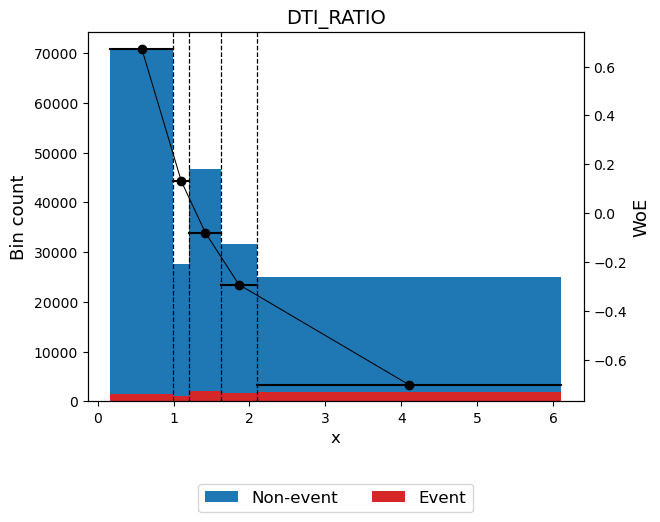


Processing: MOB
   -> STATUS: OPTIMAL
   -> IV: 0.0002
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 69.50)",113312,0.561983,108645,4667,0.041187,-0.013207,0.000099,0.000012
1,"[69.50, inf)",88317,0.438017,84784,3533,0.040004,0.017183,0.000128,0.000016
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.000227,0.000028


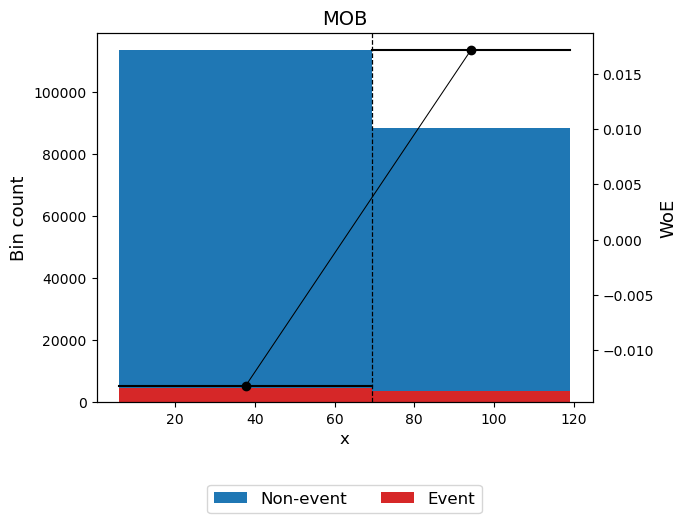


Processing: CNT_OTHER_PRODUCTS
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 1.50)",171449,0.850319,164502,6947,0.040519,0.003836,0.000012,0.000002
1,"[1.50, inf)",30180,0.149681,28927,1253,0.041518,-0.021542,0.000070,0.000009
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.000083,0.000010


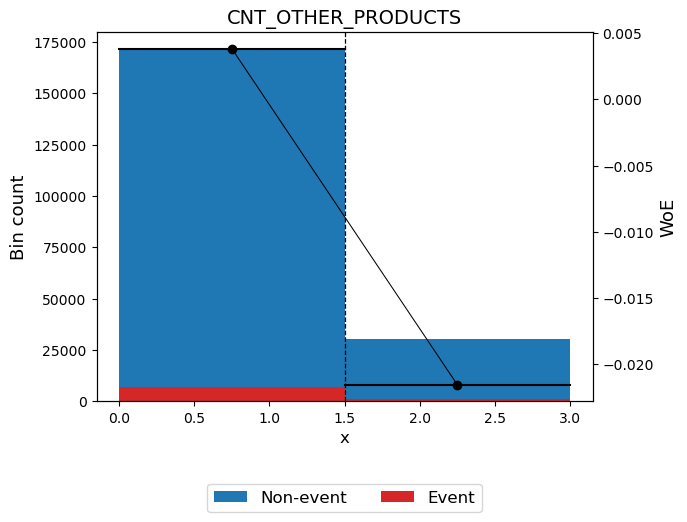


Processing: LIMIT_TO_INCOME
   -> STATUS: OPTIMAL
   -> IV: 0.0793
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 25.72)",23786,0.117969,23010,776,0.032624,0.228755,0.005564,0.000694
1,"[25.72, 28.96)",47148,0.233835,45521,1627,0.034508,0.17066,0.006301,0.000787
2,"[28.96, 31.58)",39576,0.196281,38112,1464,0.036992,0.09858,0.001823,0.000228
3,"[31.58, 36.47)",70126,0.347797,67404,2722,0.038816,0.048561,0.000802,0.000100
4,"[36.47, inf)",20993,0.104117,19382,1611,0.076740,-0.673287,0.064811,0.007952
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.079302,0.009761


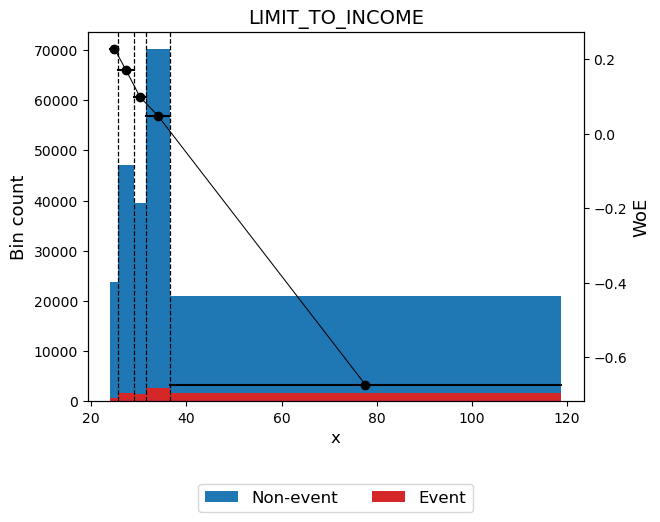


Processing: AMT_VAR_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0004
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, -0.04)",86240,0.427716,82809,3431,0.039784,0.022909,0.000222,2.776447e-05
1,"[-0.04, 0.04)",31690,0.157170,30396,1294,0.040833,-0.004204,0.000003,3.478149e-07
2,"[0.04, inf)",83699,0.415114,80224,3475,0.041518,-0.021548,0.000195,2.433272e-05
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,201629,1.000000,193429,8200,0.040669,,0.000420,5.244501e-05


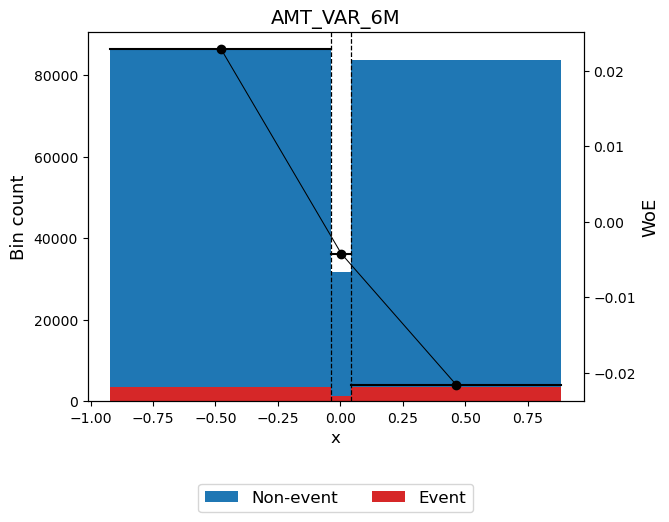


Processing: CBAL_SHORTTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0086
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 48559692.00)",37625,0.186605,36297,1328,0.035296,0.147285,0.003785,0.000473
1,"[48559692.00, 97929768.00)",37304,0.185013,35884,1420,0.038066,0.068858,0.000850,0.000106
2,"[97929768.00, 156535280.00)",36785,0.182439,35313,1472,0.040016,0.016853,0.000051,0.000006
3,"[156535280.00, 385707936.00)",68146,0.337977,65171,2975,0.043656,-0.074006,0.001915,0.000239
4,"[385707936.00, inf)",21769,0.107966,20764,1005,0.046167,-0.132543,0.002017,0.000252
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.008618,0.001077


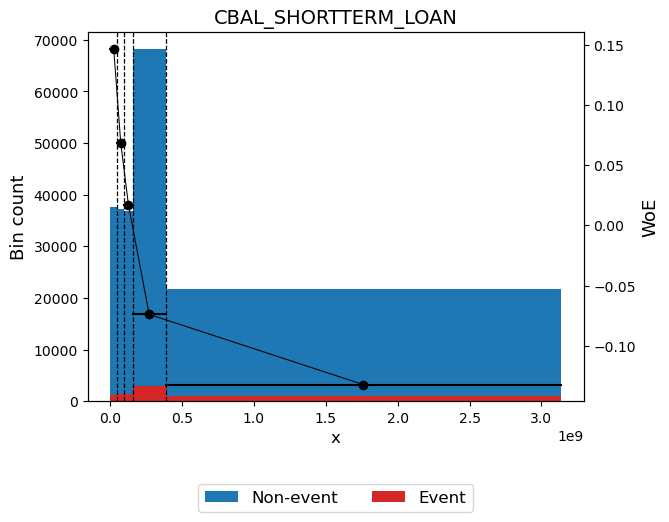


Processing: CBAL_LONGTERM_LOAN
   -> STATUS: OPTIMAL
   -> IV: 0.0099
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 50536192.00)",39508,0.195944,38093,1415,0.035816,0.132125,3.220450e-03,4.022637e-04
1,"[50536192.00, 127406020.00)",55422,0.274871,53317,2105,0.037981,0.071163,1.347399e-03,1.683893e-04
2,"[127406020.00, 178786400.00)",28782,0.142747,27611,1171,0.040685,-0.00042,2.521024e-08,3.151281e-09
3,"[178786400.00, 254561568.00)",29428,0.145951,28169,1259,0.042782,-0.052872,4.180551e-04,5.225080e-05
4,"[254561568.00, inf)",48489,0.240486,46239,2250,0.046402,-0.137883,4.872963e-03,6.086383e-04
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000e+00,0.000000e+00
Totals,,201629,1.000000,193429,8200,0.040669,,9.858892e-03,1.231545e-03


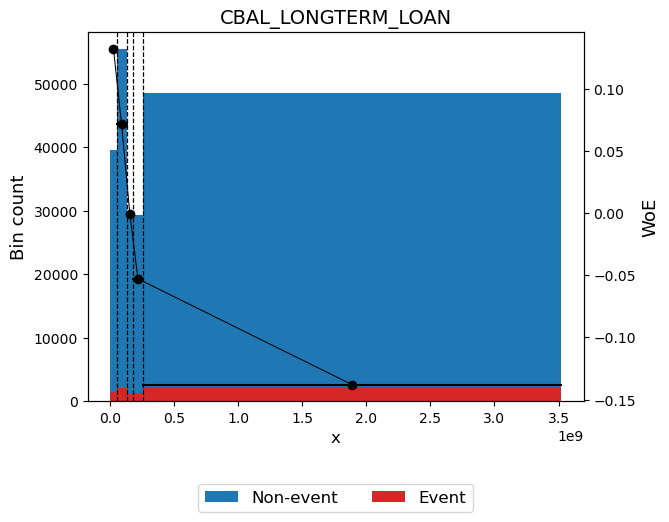


Processing: CNT_DPD_30PLUS_6M
   -> STATUS: OPTIMAL
   -> IV: 0.0323
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 0.50)",169213,0.839229,162887,6326,0.037385,0.087612,0.006189,0.000773
1,"[0.50, inf)",32416,0.160771,30542,1874,0.057811,-0.369749,0.026119,0.003246
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.032307,0.004020


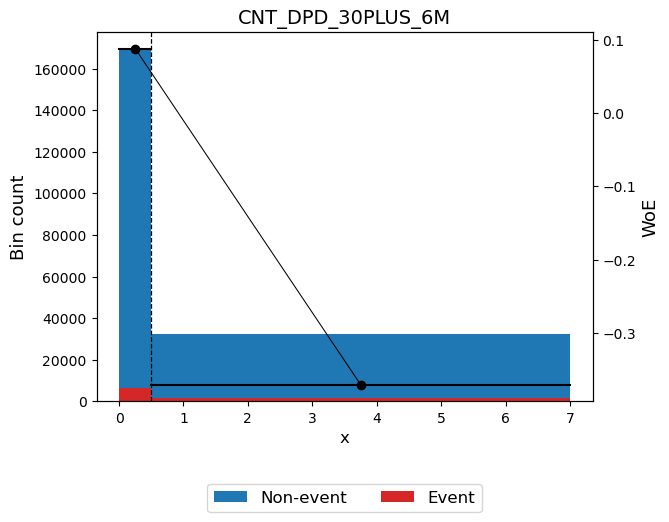


Processing: OCCUPATION_TYPE
   -> STATUS: OPTIMAL
   -> IV: 0.0005
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,[4],20364,0.100997,19575,789,0.038745,0.050466,0.000251,0.000031
1,[2],60769,0.301390,58341,2428,0.039955,0.018461,0.000102,0.000013
2,[3],40271,0.199728,38615,1656,0.041121,-0.011541,0.000027,0.000003
3,[1],80225,0.397884,76898,3327,0.041471,-0.020367,0.000167,0.000021
4,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
5,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.000547,0.000068


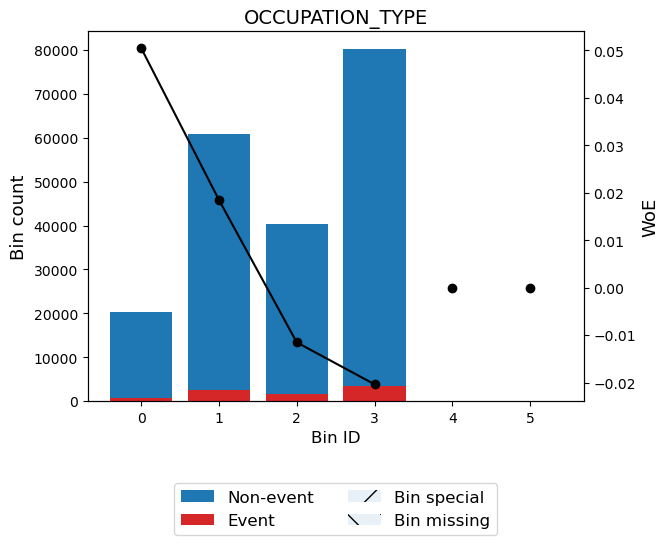


Processing: DURATION_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0001
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 48.00)",66144,0.328048,63427,2717,0.041077,-0.010415,0.000036,0.000004
1,"[48.00, inf)",135485,0.671952,130002,5483,0.040469,0.005121,0.000018,0.000002
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.000053,0.000007


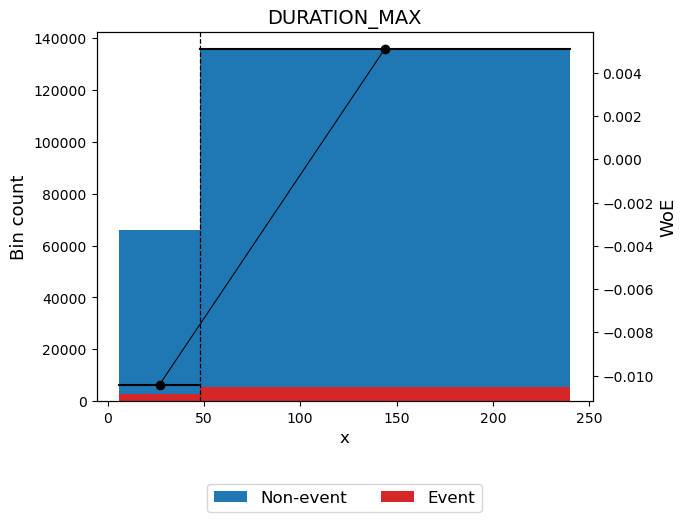


Processing: REMAINING_DURATION_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0000
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 43.50)",126938,0.629562,121760,5178,0.040792,-0.003143,0.000006,7.786853e-07
1,"[43.50, inf)",74691,0.370438,71669,3022,0.040460,0.005363,0.000011,1.328562e-06
2,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
3,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,201629,1.000000,193429,8200,0.040669,,0.000017,2.107247e-06


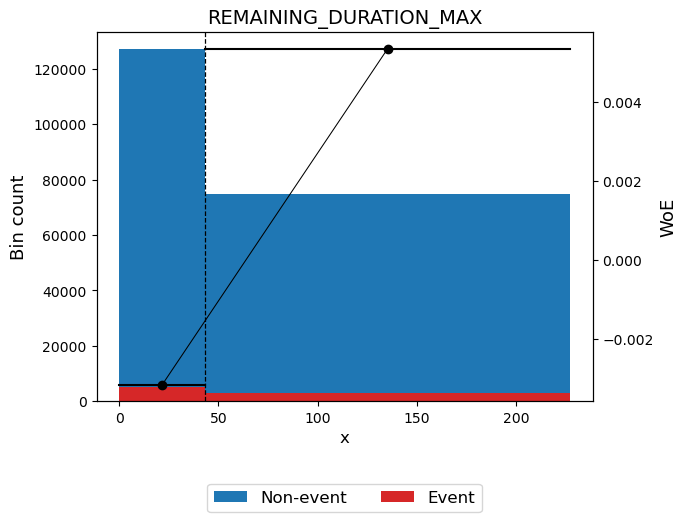


Processing: TIME_TO_OP_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0003
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 14.50)",46620,0.231217,44674,1946,0.041742,-0.027161,0.000173,0.000022
1,"[14.50, 25.50)",40727,0.201990,39053,1674,0.041103,-0.011073,0.000025,0.000003
2,"[25.50, inf)",114282,0.566793,109702,4580,0.040076,0.015292,0.000132,0.000016
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.000329,0.000041


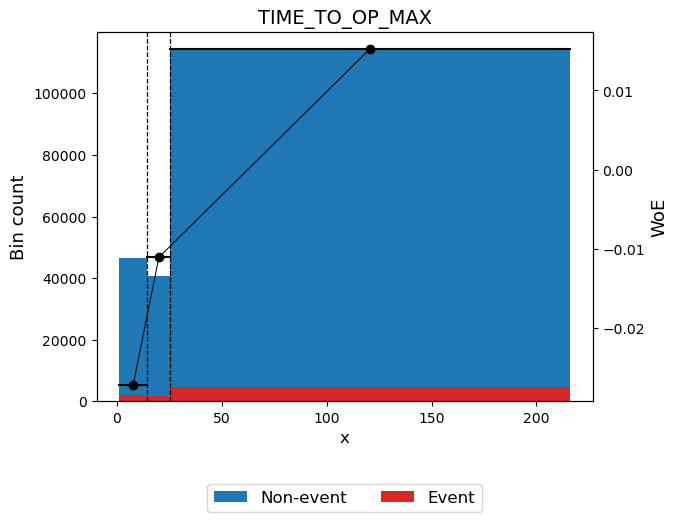


Processing: RATE_AVG
   -> STATUS: OPTIMAL
   -> IV: 0.0786
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 6.73)",25759,0.127754,25151,608,0.023603,0.561702,0.031388,0.003873
1,"[6.73, 7.66)",22500,0.111591,21845,655,0.029111,0.346316,0.011448,0.001424
2,"[7.66, 8.73)",34058,0.168914,32861,1197,0.035146,0.151692,0.003627,0.000453
3,"[8.73, 10.55)",61212,0.303587,58645,2567,0.041936,-0.032012,0.000316,0.000039
4,"[10.55, inf)",58100,0.288153,54927,3173,0.054613,-0.309449,0.031869,0.003968
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.078648,0.009757


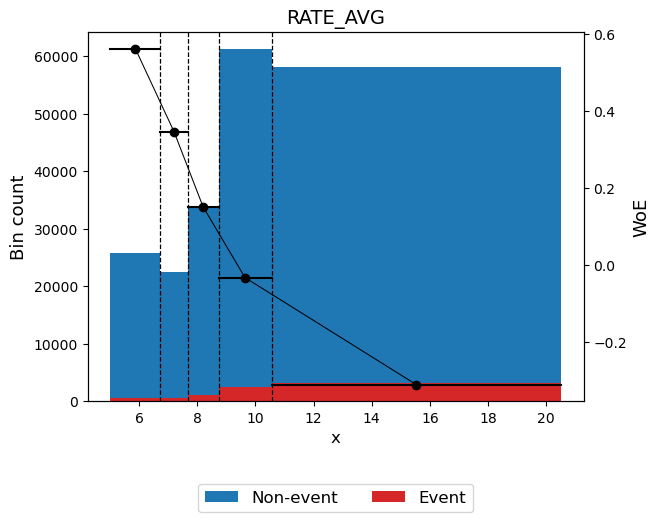


Processing: PURCOD_MAX
   -> STATUS: OPTIMAL
   -> IV: 0.0006
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"[9, 6]",120489,0.597578,115677,4812,0.039937,0.018913,0.000212,2.648707e-05
1,[3],20383,0.101092,19550,833,0.040867,-0.005079,0.000003,3.267911e-07
2,"[2, 1]",60757,0.301331,58202,2555,0.042053,-0.034909,0.000373,4.664212e-05
3,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
4,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000e+00
Totals,,201629,1.000000,193429,8200,0.040669,,0.000588,7.345598e-05


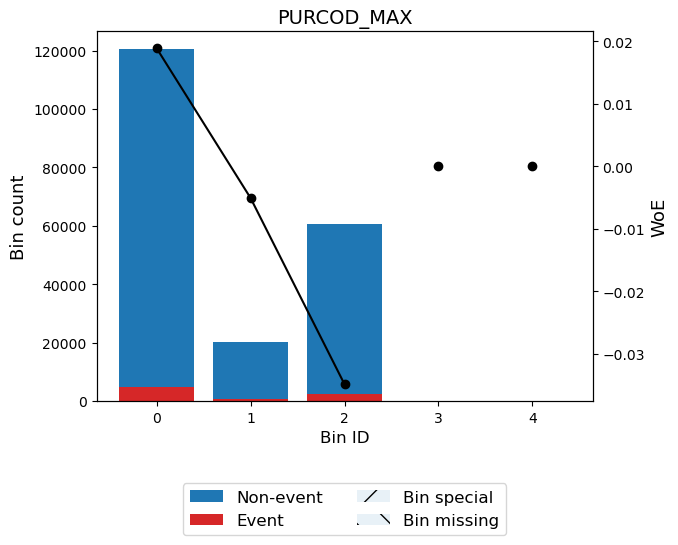


Processing: MAX_DPD_12M
   -> STATUS: OPTIMAL
   -> IV: 1.0647
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 3.50)",47679,0.236469,47484,195,0.004090,2.334372,0.517542,0.053116
1,"[3.50, 9.50)",40601,0.201365,40231,370,0.009113,1.528114,0.248879,0.028397
2,"[9.50, 19.50)",37842,0.187681,36246,1596,0.042175,-0.037948,0.000275,0.000034
3,"[19.50, 48.50)",47998,0.238051,44763,3235,0.067399,-0.533423,0.086998,0.010748
4,"[48.50, inf)",27509,0.136434,24705,2804,0.101930,-0.984818,0.210977,0.025356
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,1.064671,0.117651


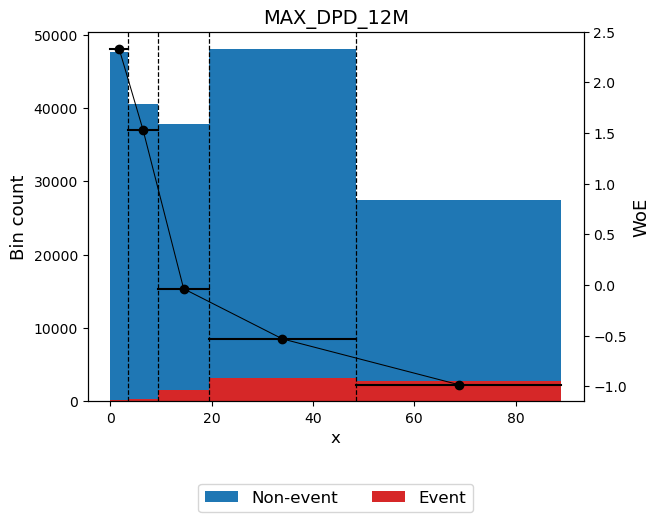


Processing: N_AVG_OVERDUE_CBAL_12M
   -> STATUS: OPTIMAL
   -> IV: 0.1409
   -> Chi tiết các Bin:


,Bin,Count,Count (%),Non-event,Event,Event rate,WoE,IV,JS
0,"(-inf, 72753056.00)",34409,0.170655,33906,503,0.014618,1.049981,0.119643,0.014304
1,"[72753056.00, 101043796.00)",24792,0.122959,23844,948,0.038238,0.064157,0.000491,0.000061
2,"[101043796.00, 125364900.00)",22282,0.110510,21278,1004,0.045059,-0.107095,0.001332,0.000166
3,"[125364900.00, 293162096.00)",93742,0.464923,89348,4394,0.046873,-0.148477,0.010978,0.001371
4,"[293162096.00, inf)",26404,0.130953,25053,1351,0.051166,-0.240628,0.008479,0.001057
5,Special,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
6,Missing,0,0.000000,0,0,0.000000,0.0,0.000000,0.000000
Totals,,201629,1.000000,193429,8200,0.040669,,0.140923,0.016960


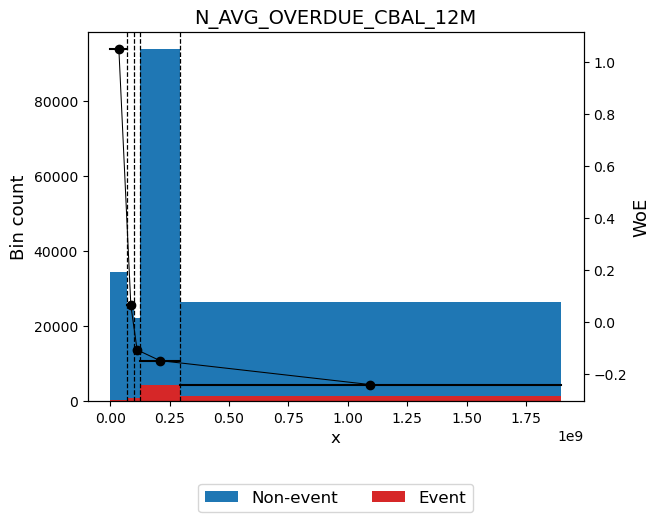

In [5]:
forced_cat_cols = [
    "C_GIOITINH", "TTHONNHAN", "PURCOD_MAX", 
    "OCCUPATION_TYPE", "MAX_NHOMNOCIC"
]

exclude_cols = [
    "SEGMENT", "SAMPLE_TYPE", target_col
]

candidates = [c for c in train.columns if c not in exclude_cols]

# --- BƯỚC LỌC THÔ (PRE-FILTER) ---
clean_candidates = []
for c in candidates:
    # 1. Loại biến chỉ có 1 giá trị duy nhất (Constant)
    if train[c].nunique() <= 1:
        print(f"Skip {c}: Biến hằng số (1 unique value)")
        continue
        
    # 2. Loại biến 100% Missing
    if train[c].isnull().all():
        print(f"Skip {c}: Biến 100% Null")
        continue
        
    clean_candidates.append(c)

# Cập nhật lại list cần chạy
candidates = clean_candidates

binning_results = {}

for feature in candidates:
    print(f"\nProcessing: {feature}")

    try:
        # Xác định loại biến
        is_categorical = feature in forced_cat_cols or \
                         (not pd.api.types.is_numeric_dtype(train[feature]))

        x_clean = train[feature].values 
        dtype_input = "numerical"
        
        if is_categorical:
            dtype_input = "categorical"
            x_clean = train[feature].astype(str).values

        optb = OptimalBinning(
            name=feature,
            dtype=dtype_input,
            solver="mip",
            monotonic_trend='auto_asc_desc',
            max_n_bins=5,
            prebinning_method='cart',
            divergence='iv',
            min_n_bins=2,
            min_bin_size=0.1
        )

        optb.fit(x_clean, train[target_col])

        print(f"   -> STATUS: {optb.status}")

        if optb.status in ["OPTIMAL", "FEASIBLE"]:
            optb.binning_table.build()
            # Lưu lại kết quả
            binning_results[feature] = optb
 
            # IV
            print(f"   -> IV: {optb.binning_table.iv:.4f}")

            # Hiển thị bảng
            print("   -> Chi tiết các Bin:")
            display(optb.binning_table.build())

            # Vẽ WOE
            try:
                # 1. Xóa plot cũ
                plt.close('all')
                
                # 2. Xử lý tiêu đề cho gọn
                plot_title = f"Var: {feature} | IV: {optb.binning_table.iv:.4f}"
                
                # 3. Vẽ hình dựa trên loại biến
                if dtype_input == "numerical":
                    # Biến số: Vẽ style="actual" để thấy xu hướng tăng/giảm rõ ràng
                    optb.binning_table.plot(metric="woe", style="actual", add_special=True)
                else:
                    # Biến category: KHÔNG dùng style="actual", chỉ vẽ cột mặc định
                    optb.binning_table.plot(metric="woe", add_special=True)
                
                # 4. Hiển thị
                plt.show()
                plt.close() # Đóng ngay

            except Exception as e_plot:
                print(f"   -> Lỗi vẽ hình: {e_plot}")

        else:
            print("   -> Skip: Không tạo được bin tối ưu")

    except Exception as e:
        print(f"   -> ERROR: {e}")

TỔNG HỢP KẾT QUẢ VÀ KIỂM TRA CHẤT LƯỢNG BIẾN

In [6]:
summary_data = []

for feature, optb in binning_results.items():
    # 1. Lấy bảng binning chi tiết
    bt = optb.binning_table.build()
    
    # --- SỬA LỖI TẠI ĐÂY ---
    # Chuyển cột Bin sang string trước khi so sánh để tránh lỗi với biến Category (list)
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    
    # Chỉ xét các bin có dữ liệu (Count > 0)
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    if valid_bins.empty:
        continue

    # 2. Tính toán các chỉ số
    iv_value = optb.binning_table.iv
    min_bin_pct = valid_bins['Count (%)'].min() # Tỷ lệ % của bin nhỏ nhất
    max_bin_pct = valid_bins['Count (%)'].max() # Tỷ lệ % của bin lớn nhất
    n_bins = len(valid_bins)

    # 3. Xác định xu hướng (Trend) với PD (Event Rate)
    trend_observed = "N/A (Categorical)"
    
    if optb.dtype == "numerical":
        # Lấy các bin số thực (loại bỏ Special/Missing)
        # Convert sang str để so sánh an toàn
        mask_special = valid_bins['Bin'].astype(str).isin(['Special', 'Missing'])
        numeric_bins = valid_bins[~mask_special]
        
        if len(numeric_bins) >= 2:
            first_er = numeric_bins.iloc[0]['Event rate']
            last_er = numeric_bins.iloc[-1]['Event rate']
            
            if last_er > first_er:
                trend_observed = "Tăng (Thuận)"
            elif last_er < first_er:
                trend_observed = "Giảm (Nghịch)"
            else:
                trend_observed = "Không rõ (Flat)"

    # 4. Gắn cờ cảnh báo (Flag Issues)
    issues = []
    if iv_value < 0.02: 
        issues.append("Weak IV")
    if min_bin_pct < 0.05: 
        issues.append("Small Bin (<5%)")
    if optb.status != "OPTIMAL":
        issues.append(f"Status: {optb.status}")
    if n_bins < 2:
        issues.append("Single Bin")

    # 5. Đưa vào danh sách tổng hợp
    summary_data.append({
        "Variable": feature,
        "IV": iv_value,
        "Trend_PD": trend_observed,
        "Min_Bin_Pct": min_bin_pct,
        "Max_Bin_Pct": max_bin_pct,
        "Num_Bins": n_bins,
        "Quality_Check": ", ".join(issues) if issues else "PASS"
    })

# --- HIỂN THỊ KẾT QUẢ ---
if summary_data:
    df_summary = pd.DataFrame(summary_data)
    
    # Sắp xếp theo IV giảm dần
    df_summary = df_summary.sort_values("IV", ascending=False).reset_index(drop=True)
    
    # Hiển thị full danh sách
    pd.set_option('display.max_rows', None)
    
    print(f"Tổng số biến đạt yêu cầu: {len(df_summary)}")
    
    # Hiển thị bảng bình thường với format số đẹp
    display(df_summary.style.format({
        "IV": "{:.4f}",
        "Min_Bin_Pct": "{:.2%}",
        "Max_Bin_Pct": "{:.2%}"
    }))
    
else:
    print("Không có biến nào được xử lý thành công.")

Tổng số biến đạt yêu cầu: 34


,Variable,IV,Trend_PD,Min_Bin_Pct,Max_Bin_Pct,Num_Bins,Quality_Check
0,MAX_DPD_12M,1.0647,Tăng (Thuận),13.64%,100.00%,6,PASS
1,INCOME,0.2434,Giảm (Nghịch),5.00%,100.00%,7,Small Bin (<5%)
2,FLAG_SALARY_ACC,0.2373,Giảm (Nghịch),11.39%,100.00%,3,PASS
3,DTI_RATIO,0.2221,Tăng (Thuận),12.36%,100.00%,6,PASS
4,N_AVG_DEPOSIT_12M,0.2188,Giảm (Nghịch),15.22%,100.00%,6,PASS
5,UTILIZATION_RATE,0.1840,Tăng (Thuận),14.39%,100.00%,6,PASS
6,FLAG_DEPOSIT,0.1530,Giảm (Nghịch),42.36%,100.00%,3,PASS
7,N_AVG_OVERDUE_CBAL_12M,0.1409,Tăng (Thuận),11.05%,100.00%,6,PASS
8,CNT_MIN_PAY_6M,0.0803,Tăng (Thuận),13.93%,100.00%,4,PASS
9,AVG_DAYS_PAST_DUE,0.0798,Tăng (Thuận),10.81%,100.00%,4,PASS


Multivariate ana

LOẠI BỎ BIẾN YẾU

In [7]:
# 1. Xác định danh sách biến cần loại (những biến không PASS)
# Lấy từ bảng df_summary đã tạo ở bước trước
drop_list = df_summary[df_summary['Quality_Check'] != 'PASS']['Variable'].tolist()

if drop_list:
    print(f"-> Phát hiện {len(drop_list)} biến yếu/lỗi cần loại bỏ.")
    
    # 2. Xóa khỏi dictionary lưu trữ kết quả
    for var in drop_list:
        if var in binning_results:
            del binning_results[var] # Lệnh xóa trực tiếp khỏi bộ nhớ
            
    print(f"-> Đã xóa thành công: {drop_list}")
else:
    print("-> Tuyệt vời! Tất cả các biến đều đạt chuẩn, không cần xóa gì cả.")

# 3. Cập nhật lại danh sách biến tốt để dùng cho Bước 4
final_vars_step3 = list(binning_results.keys())

print(f"\n>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: {len(final_vars_step3)}")

-> Phát hiện 16 biến yếu/lỗi cần loại bỏ.
-> Đã xóa thành công: ['INCOME', 'AMT_CASH_ADVANCE_12M', 'CBAL_LONGTERM_LOAN', 'CBAL_SHORTTERM_LOAN', 'TTHONNHAN', 'PURCOD_MAX', 'OCCUPATION_TYPE', 'AMT_VAR_6M', 'TIME_TO_OP_MAX', 'CNT_CREDIT_CARDS', 'MOB', 'CNT_OTHER_PRODUCTS', 'C_GIOITINH', 'DURATION_MAX', 'REMAINING_DURATION_MAX', 'NHANVIENBIDV']

>>> SỐ LƯỢNG BIẾN CÒN LẠI ĐỂ CHẠY ĐA CỘNG TUYẾN: 18


KIỂM TRA ĐA CỘNG TUYẾN


[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7)...
  -> Đang tính toán WoE cho 18 biến...
  -> Bắt đầu lọc tương quan...

=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===
Tổng biến đầu vào: 18
Số biến giữ lại:   14
Số biến bị loại:   4

>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):


,Variable,IV,Reason
0,UTILIZATION_RATE,0.1840,Corr với DTI_RATIO (r=0.89)
1,FLAG_DEPOSIT,0.1530,Corr với N_AVG_DEPOSIT_12M (r=0.84)
2,LTV,0.0476,Corr với N_AVG_OVERDUE_CBAL_12M (r=0.77)
3,CBAL,0.0474,Corr với N_AVG_OVERDUE_CBAL_12M (r=0.77)



>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):


,Variable,IV,Min_Bin_Pct,Max_Bin_Pct
0,MAX_DPD_12M,1.0647,13.64%,100.00%
1,FLAG_SALARY_ACC,0.2373,11.39%,100.00%
2,DTI_RATIO,0.2221,12.36%,100.00%
3,N_AVG_DEPOSIT_12M,0.2188,15.22%,100.00%
4,N_AVG_OVERDUE_CBAL_12M,0.1409,11.05%,100.00%
5,CNT_MIN_PAY_6M,0.0803,13.93%,100.00%
6,AVG_DAYS_PAST_DUE,0.0798,10.81%,100.00%
7,LIMIT_TO_INCOME,0.0793,10.41%,100.00%
8,RATE_AVG,0.0786,11.16%,100.00%
9,AFLIMT_AVG,0.0778,14.57%,100.00%


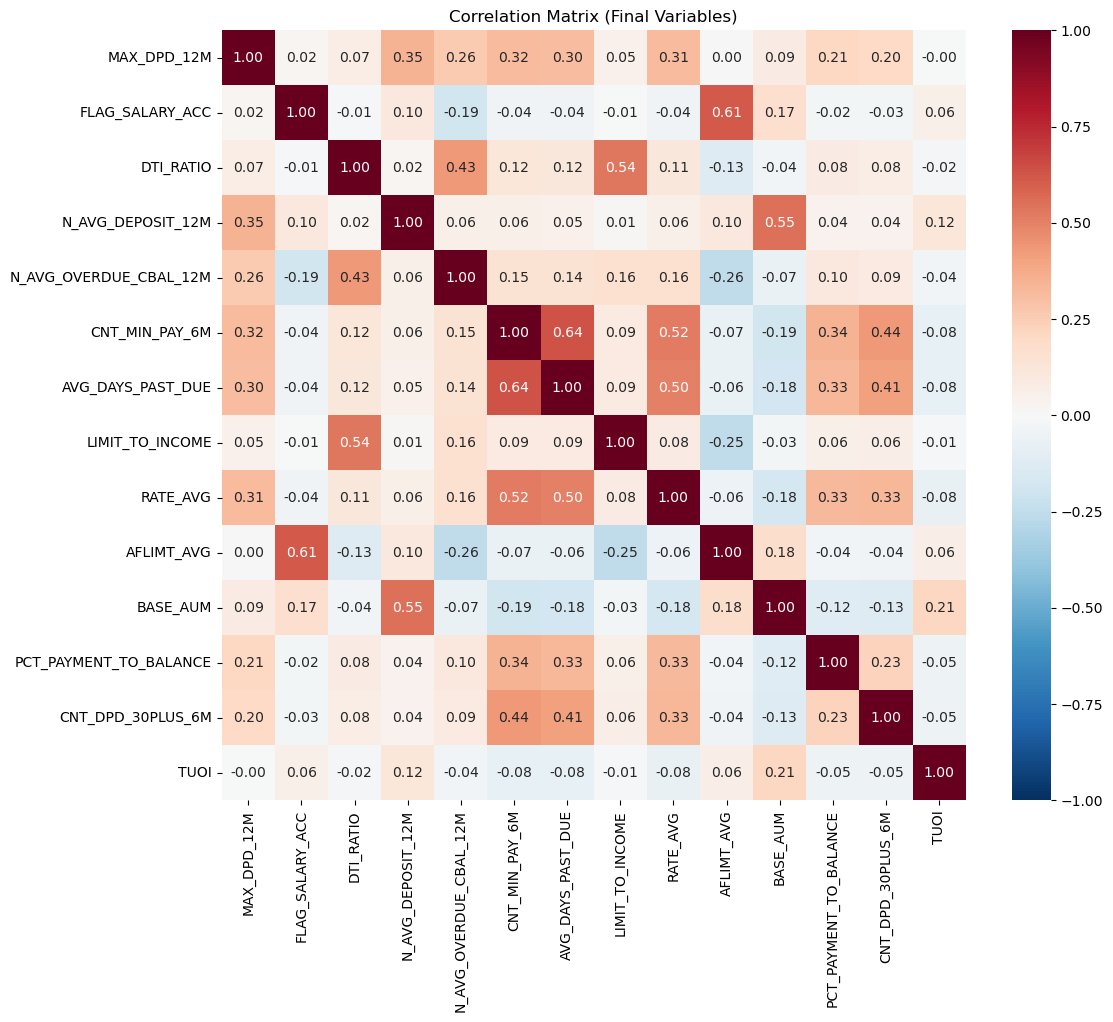

In [8]:
print("\n[BƯỚC 4] Kiểm tra tương quan và loại bỏ biến (Threshold = 0.7)...")

# --- 1. CHUẨN BỊ DANH SÁCH BIẾN ---
# Lấy danh sách các biến còn lại trong dictionary (đã được clean ở bước 3.5)
available_vars = list(binning_results.keys())

# Lấy IV để sắp xếp giảm dần
var_iv_list = []
for v in available_vars:
    iv = binning_results[v].binning_table.iv
    var_iv_list.append((v, iv))

# Sort: IV cao xếp trước
var_iv_list.sort(key=lambda x: x[1], reverse=True)
sorted_features = [x[0] for x in var_iv_list]

# --- 2. TÍNH TOÁN WOE ---
print(f"  -> Đang tính toán WoE cho {len(sorted_features)} biến...")
df_woe = pd.DataFrame()

for feature in sorted_features:
    try:
        optb = binning_results[feature]
        
        # Preprocessing (Quan trọng: phải khớp với lúc train)
        is_categorical = (optb.dtype == "categorical")
        x_raw = train[feature].copy()
        
        if is_categorical:
            x_clean = x_raw.astype(str).replace('nan', 'Missing').fillna("Missing")
        else:
            x_clean = x_raw # Numerical
            
        # Transform sang WoE
        df_woe[feature] = optb.transform(x_clean, metric="woe")
        
    except Exception as e:
        print(f"  -> Lỗi transform biến {feature}: {e}")

# --- 3. TÍNH MA TRẬN TƯƠNG QUAN & LỌC ---
corr_matrix = df_woe.corr(method='pearson')

kept_vars = []
dropped_log = []

print(f"  -> Bắt đầu lọc tương quan...")

for candidate in sorted_features:
    is_kept = True
    reason = "Initial"
    
    # So sánh biến ứng viên với các biến ĐÃ ĐƯỢC GIỮ
    for existing_var in kept_vars:
        # Lấy hệ số tương quan
        r = corr_matrix.loc[candidate, existing_var]
        
        # Nếu tương quan quá cao (>= 0.7)
        if abs(r) >= 0.7:
            is_kept = False
            reason = f"Corr với {existing_var} (r={r:.2f})"
            break # Dừng kiểm tra, loại luôn
            
    if is_kept:
        kept_vars.append(candidate)
    else:
        # Lưu log
        candidate_iv = binning_results[candidate].binning_table.iv
        dropped_log.append({
            "Variable": candidate,
            "IV": candidate_iv,
            "Reason": reason
        })

# ============================================================
# HIỂN THỊ KẾT QUẢ
# ============================================================
print(f"\n=== KẾT QUẢ SAU KHI LỌC ĐA CỘNG TUYẾN ===")
print(f"Tổng biến đầu vào: {len(sorted_features)}")
print(f"Số biến giữ lại:   {len(kept_vars)}")
print(f"Số biến bị loại:   {len(dropped_log)}")

# 1. Danh sách bị loại
if dropped_log:
    print("\n>>> DANH SÁCH BIẾN BỊ LOẠI (CORRELATION > 0.7):")
    df_dropped = pd.DataFrame(dropped_log)
    display(df_dropped.style.format({"IV": "{:.4f}"}))

# 2. Danh sách giữ lại
print("\n>>> DANH SÁCH BIẾN CUỐI CÙNG (FINAL SELECTION):")

# Tạo bảng tổng hợp thông tin cho các biến được giữ
final_summary_data = []
for v in kept_vars:
    optb = binning_results[v]
    
    # Lấy thông tin binning để hiển thị cho đẹp
    bt = optb.binning_table.build()
    bt_clean = bt[bt['Bin'].astype(str) != 'Totals']
    valid_bins = bt_clean[bt_clean['Count'] > 0]
    
    final_summary_data.append({
        "Variable": v,
        "IV": optb.binning_table.iv,
        "Min_Bin_Pct": valid_bins['Count (%)'].min() if not valid_bins.empty else 0,
        "Max_Bin_Pct": valid_bins['Count (%)'].max() if not valid_bins.empty else 0
    })

df_final = pd.DataFrame(final_summary_data)
# Sort lại theo IV giảm dần để dễ nhìn
df_final = df_final.sort_values("IV", ascending=False).reset_index(drop=True)

display(df_final.style.format({
    "IV": "{:.4f}",
    "Min_Bin_Pct": "{:.2%}",
    "Max_Bin_Pct": "{:.2%}"
}))

# 3. Vẽ Heatmap (Chỉ vẽ nếu số lượng biến <= 30 để nhìn cho rõ)
if len(kept_vars) <= 30:
    plt.figure(figsize=(12, 10))
    sns.heatmap(df_woe[kept_vars].corr(), annot=True, fmt=".2f", cmap="RdBu_r", vmin=-1, vmax=1)
    plt.title("Correlation Matrix (Final Variables)")
    plt.show()

In [9]:
def transform_to_woe(df, binning_dict, features):
    df_woe = pd.DataFrame(index=df.index)
    for col in features:
        optb = binning_dict[col]
        x_raw = df[col].astype(str).replace("nan", "Missing").fillna("Missing") \
                if optb.dtype == "categorical" else df[col]

        df_woe[col] = optb.transform(x_raw, metric="woe")
    return df_woe

X_train_woe = transform_to_woe(train, binning_results, kept_vars)
X_oos_woe   = transform_to_woe(oos,   binning_results, kept_vars)
X_oot_woe   = transform_to_woe(oot,   binning_results, kept_vars)

X_train_full_woe = X_train_woe.copy() 

LASSO REGRESSION 

In [10]:
# ============================================================
# CẤU HÌNH TOÀN CỤC (CHỈNH 1 LẦN Ở ĐÂY)
# ============================================================
TARGET_LASSO_VARS = 15      # Số lượng biến giữ lại sau Lasso
BRUTE_FORCE_K_MIN = 8       # Số biến tối thiểu trong mô hình final
BRUTE_FORCE_K_MAX = 15      # Số biến tối đa
N_JOBS            = 5     # Số luồng CPU chạy song song
TARGET_COL        = target_col # Tên biến target (đã define ở đầu notebook)

# ============================================================
# BƯỚC 5: LỌC BIẾN BẰNG LASSO (PHIÊN BẢN SILENT)
# ============================================================
print(f"\n[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top {TARGET_LASSO_VARS} biến)...")

lr_lasso = LogisticRegression(
    penalty='l1',
    C=1.0,
    solver='liblinear',
    random_state=42
)

lr_lasso.fit(X_train_full_woe, y_train_full)

# Lấy độ quan trọng theo trị tuyệt đối hệ số
coefs_abs = np.abs(lr_lasso.coef_[0])
df_imp = pd.DataFrame({
    'Variable': kept_vars,
    'Imp': coefs_abs
}).sort_values('Imp', ascending=False)

final_vars_lasso = df_imp.head(TARGET_LASSO_VARS)['Variable'].tolist()

kept_vars = final_vars_lasso
print(f"  -> {len(kept_vars)} biến sau LASSO: {kept_vars}")
std_devs = X_train_full_woe[kept_vars].std()


[BƯỚC 5] Chạy Lasso Regression (Giữ lại Top 15 biến)...
  -> 14 biến sau LASSO: ['FLAG_SALARY_ACC', 'MAX_DPD_12M', 'TUOI', 'DTI_RATIO', 'N_AVG_OVERDUE_CBAL_12M', 'AFLIMT_AVG', 'N_AVG_DEPOSIT_12M', 'LIMIT_TO_INCOME', 'AVG_DAYS_PAST_DUE', 'PCT_PAYMENT_TO_BALANCE', 'RATE_AVG', 'CNT_MIN_PAY_6M', 'CNT_DPD_30PLUS_6M', 'BASE_AUM']


In [11]:
# ============================================================
# BƯỚC 7: BRUTE-FORCE OPTIMIZED
# ============================================================
print(f"\n[BƯỚC 7] Chạy Brute-force ({BRUTE_FORCE_K_MIN}-{BRUTE_FORCE_K_MAX} biến) trên {N_JOBS} luồng CPU...")

# Worker Function
def process_combo(cols_idx, feature_names, X_data, y_data, stds):
    vars_names = feature_names[list(cols_idx)]
    vars_names = [v for v in vars_names if v in X_data.columns]   # thêm
    if len(vars_names) == 0:
        return None
    
    X_sub = X_data[vars_names]

    clf = LogisticRegression(
        penalty='l2',
        C=1e9,
        solver='liblinear',
        random_state=42
    )
    clf.fit(X_sub, y_data)

    coefs = clf.coef_[0]

    # Rule 1: Sign must be negative
    if np.any(coefs >= 0):
        return None

    # Rule 2: Weight constraint
    imp = np.abs(coefs * stds[vars_names].values)
    total = imp.sum()
    if total == 0:
        return None
    w = (imp / total) * 100
    if np.any((w < 3) | (w > 35)):
        return None

    # Rule 3: Gini
    pred = clf.predict_proba(X_sub)[:, 1]
    gini = 2 * roc_auc_score(y_data, pred) - 1
    if gini < 0.4:
        return None

    return (len(vars_names), list(vars_names), coefs, w, gini)

# Main Loop
feature_names_arr = np.array(kept_vars)
combos = []

for k in range(BRUTE_FORCE_K_MIN, BRUTE_FORCE_K_MAX + 1):
    combos.extend(itertools.combinations(range(len(kept_vars)), k))

print(f"  -> Tổng số mô hình cần kiểm tra: {len(combos)}")
print("  -> Đang xử lý (vui lòng chờ)...")

# Chạy song song 
results = Parallel(n_jobs=N_JOBS, verbose=1)(
    delayed(process_combo)(c, feature_names_arr, X_train_full_woe, y_train_full, std_devs)
    for c in combos
)

valid_models = [r for r in results if r is not None]
print(f" -> Số mô hình đạt chuẩn: {len(valid_models)}")


[BƯỚC 7] Chạy Brute-force (8-15 biến) trên 5 luồng CPU...
  -> Tổng số mô hình cần kiểm tra: 6476
  -> Đang xử lý (vui lòng chờ)...


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   12.3s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:   43.3s
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  1.5min
[Parallel(n_jobs=5)]: Done 790 tasks      | elapsed:  2.5min
[Parallel(n_jobs=5)]: Done 1240 tasks      | elapsed:  3.6min
[Parallel(n_jobs=5)]: Done 1790 tasks      | elapsed:  5.0min
[Parallel(n_jobs=5)]: Done 2440 tasks      | elapsed:  6.8min
[Parallel(n_jobs=5)]: Done 3190 tasks      | elapsed:  8.7min
[Parallel(n_jobs=5)]: Done 4040 tasks      | elapsed: 11.3min
[Parallel(n_jobs=5)]: Done 4990 tasks      | elapsed: 14.0min
[Parallel(n_jobs=5)]: Done 6040 tasks      | elapsed: 17.3min


 -> Số mô hình đạt chuẩn: 312


[Parallel(n_jobs=5)]: Done 6476 out of 6476 | elapsed: 18.9min finished


In [12]:
# ============================================================
# BƯỚC 8: LỌC TOP 10 MÔ HÌNH ỔN ĐỊNH NHẤT
# ============================================================

X_train_final = X_train_full_woe
X_oos_final = X_oos_woe
X_oot_final = X_oot_woe

print("\n[BƯỚC 8] Đánh giá toàn bộ model hợp lệ trên Train / OOS / OOT...")

model_records = []

for idx, (num_vars, vars_list, coefs, weights, gini_train_bruteforce) in enumerate(valid_models):

    # 1. Fit Statsmodels Logit
    X_train_best = sm.add_constant(X_train_final[vars_list])
    model_sm = sm.Logit(y_train_full, X_train_best).fit(disp=0)

    # 2. Predict Train
    pred_train = model_sm.predict(X_train_best)
    g_train = 2 * roc_auc_score(y_train_full, pred_train) - 1

    # 3. Predict OOS
    X_oos_best = sm.add_constant(X_oos_final[vars_list])
    pred_oos = model_sm.predict(X_oos_best)
    g_oos = 2 * roc_auc_score(oos[TARGET_COL], pred_oos) - 1

    # 4. Predict OOT
    X_oot_best = sm.add_constant(X_oot_final[vars_list])
    pred_oot = model_sm.predict(X_oot_best)
    g_oot = 2 * roc_auc_score(oot[TARGET_COL], pred_oot) - 1

    # 5. Stability score (chênh lệch càng nhỏ càng tốt)
    stab_oos = abs(g_train - g_oos)
    stab_oot = abs(g_train - g_oot)
    stab_total = stab_oos + stab_oot    # tổng độ chênh

    # 6. Lưu kết quả
    model_records.append({
        "Vars": vars_list,
        "Num_Vars": num_vars,
        "Gini_Train": g_train,
        "Gini_OOS": g_oos,
        "Gini_OOT": g_oot,
        "Stability": stab_total,
        "Weights": weights,
        "SM_Model": model_sm
    })

# ============================================================
# SẮP XẾP MODEL THEO TIÊU CHÍ:
# 1. Gini OOS giảm dần
# 2. Stability tăng dần (ổn định hơn)
# ============================================================

df_models = pd.DataFrame(model_records)

df_models_sorted = df_models.sort_values(
    by=["Gini_OOS", "Stability"],
    ascending=[False, True]
).reset_index(drop=True)

# Lấy top 10
top10 = df_models_sorted.head(10)

print("\n>>> TOP 10 MODEL TỐT NHẤT (SẮP XẾP THEO GINI OOS & STABILITY)")
display(top10[["Num_Vars", "Vars", "Gini_Train", "Gini_OOS", "Gini_OOT", "Stability"]]
        .style.format({
            "Gini_Train": "{:.2%}",
            "Gini_OOS": "{:.2%}",
            "Gini_OOT": "{:.2%}",
            "Stability": "{:.4f}"
        }))

# ============================================================
# IN RA DANH SÁCH BIẾN CỦA 10 MODEL
# ============================================================

print("\n>>> DANH SÁCH BIẾN CỦA TOP 10 MÔ HÌNH")
for i, row in top10.iterrows():
    print(f"\n--- Model #{i+1} ({row['Num_Vars']} biến) ---")
    print(row["Vars"])


[BƯỚC 8] Đánh giá toàn bộ model hợp lệ trên Train / OOS / OOT...

>>> TOP 10 MODEL TỐT NHẤT (SẮP XẾP THEO GINI OOS & STABILITY)


,Num_Vars,Vars,Gini_Train,Gini_OOS,Gini_OOT,Stability
0,10,"[np.str_('FLAG_SALARY_ACC'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('AFLIMT_AVG'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]",46.17%,47.70%,46.72%,0.0209
1,8,"[np.str_('FLAG_SALARY_ACC'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]",45.93%,47.59%,46.34%,0.0205
2,9,"[np.str_('FLAG_SALARY_ACC'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('AVG_DAYS_PAST_DUE'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]",46.14%,47.57%,46.58%,0.0186
3,10,"[np.str_('FLAG_SALARY_ACC'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('AFLIMT_AVG'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_DPD_30PLUS_6M')]",45.82%,47.56%,46.04%,0.0197
4,10,"[np.str_('FLAG_SALARY_ACC'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('AFLIMT_AVG'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('AVG_DAYS_PAST_DUE'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG')]",46.20%,47.55%,46.61%,0.0177
5,10,"[np.str_('FLAG_SALARY_ACC'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('AFLIMT_AVG'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('AVG_DAYS_PAST_DUE'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]",46.28%,47.54%,46.95%,0.0192
6,9,"[np.str_('FLAG_SALARY_ACC'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('AFLIMT_AVG'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]",46.05%,47.53%,46.72%,0.0214
7,9,"[np.str_('FLAG_SALARY_ACC'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('AFLIMT_AVG'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]",45.92%,47.47%,46.73%,0.0236
8,8,"[np.str_('FLAG_SALARY_ACC'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_DPD_30PLUS_6M')]",45.58%,47.47%,45.63%,0.0194
9,10,"[np.str_('FLAG_SALARY_ACC'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('AFLIMT_AVG'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('AVG_DAYS_PAST_DUE'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]",46.11%,47.47%,46.93%,0.0218



>>> DANH SÁCH BIẾN CỦA TOP 10 MÔ HÌNH

--- Model #1 (10 biến) ---
[np.str_('FLAG_SALARY_ACC'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('AFLIMT_AVG'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('LIMIT_TO_INCOME'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]

--- Model #2 (8 biến) ---
[np.str_('FLAG_SALARY_ACC'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]

--- Model #3 (9 biến) ---
[np.str_('FLAG_SALARY_ACC'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('N_AVG_DEPOSIT_12M'), np.str_('AVG_DAYS_PAST_DUE'), np.str_('PCT_PAYMENT_TO_BALANCE'), np.str_('RATE_AVG'), np.str_('CNT_MIN_PAY_6M')]

--- Model #4 (10 biến) ---
[np.str_('FLAG_SALARY_ACC'), np.str_('TUOI'), np.str_('DTI_RATIO'), np.str_('N_AVG_OVERDUE_CBAL_12M'), np.str_('AFLIMT_AVG

In [13]:
best = top10.iloc[9]
best_vars = best["Vars"]

# Model RAW đã fit bằng statsmodels → đây là model final
model_sm = best["SM_Model"]

In [14]:
# ============================================================
# BƯỚC 9 – PLATT SCALING (CALIBRATION MODULE)
# ============================================================

print("\n[BƯỚC 9] Chạy Platt Scaling (calibrate PD)...")

# 1. Lấy logit_raw từ model RAW
logit_train = model_sm.predict(sm.add_constant(X_train_final[best_vars]), linear=True)
logit_oos   = model_sm.predict(sm.add_constant(X_oos_final[best_vars]), linear=True)
logit_oot   = model_sm.predict(sm.add_constant(X_oot_final[best_vars]), linear=True)

# 2. Fit Platt model trên TRAIN
model_platt = LogisticRegression(solver="lbfgs")
model_platt.fit(logit_train.values.reshape(-1, 1), y_train_full)

# 3. Predict PD đã calibrate
pd_train = model_platt.predict_proba(logit_train.values.reshape(-1,1))[:,1]
pd_oos   = model_platt.predict_proba(logit_oos.values.reshape(-1,1))[:,1]
pd_oot   = model_platt.predict_proba(logit_oot.values.reshape(-1,1))[:,1]

print(" -> Hoàn tất Platt Scaling!")


[BƯỚC 9] Chạy Platt Scaling (calibrate PD)...
 -> Hoàn tất Platt Scaling!


In [15]:
# ============================================================
# BƯỚC CUỐI SEGMENT – EXPORT PD CALIBRATED
# ============================================================

print("\n[EXPORT] Xuất file PD calibrated cho segment...")

segment_name = 'seg2'

# Tạo ROW_ID cho từng dataset
train_exp = train.reset_index(drop=False).rename(columns={"index": "ROW_ID"})
oos_exp   = oos.reset_index(drop=False).rename(columns={"index": "ROW_ID"})
oot_exp   = oot.reset_index(drop=False).rename(columns={"index": "ROW_ID"})

# Tạo dataframe cho từng tập
df_train_exp = pd.DataFrame({
    "ROW_ID": train_exp["ROW_ID"],
    "SEGMENT": segment_name,
    "DATA_TYPE": "TRAIN",
    "y": y_train_full,
    "PD": pd_train
})

df_oos_exp = pd.DataFrame({
    "ROW_ID": oos_exp["ROW_ID"],
    "SEGMENT": segment_name,
    "DATA_TYPE": "OOS",
    "y": oos[TARGET_COL],
    "PD": pd_oos
})

df_oot_exp = pd.DataFrame({
    "ROW_ID": oot_exp["ROW_ID"],
    "SEGMENT": segment_name,
    "DATA_TYPE": "OOT",
    "y": oot[TARGET_COL],
    "PD": pd_oot
})

# GHÉP 3 TẬP LẠI
df_export = pd.concat([df_train_exp, df_oos_exp, df_oot_exp], ignore_index=True)

# Xuất file
output_file = f"{segment_name}_pd_calibrated.parquet"
df_export.to_parquet(output_file, index=False)

print(f"✔ Đã xuất file chuẩn: {output_file}")
print(df_export.head())


[EXPORT] Xuất file PD calibrated cho segment...
✔ Đã xuất file chuẩn: seg2_pd_calibrated.parquet
   ROW_ID SEGMENT DATA_TYPE  y        PD
0       0    seg2     TRAIN  0  0.026125
1       1    seg2     TRAIN  0  0.070886
2       2    seg2     TRAIN  0  0.039859
3       3    seg2     TRAIN  0  0.022337
4       4    seg2     TRAIN  0  0.030159
